# HOMEWORK 5

### Author : Abhijay Ghildyal
### BSysE 530 Machine Vision

### Load Data

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.io import loadmat

In [4]:
img = loadmat('200.mat')

In [5]:
img

{'__globals__': [],
 '__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Tue Mar 08 16:14:15 2011',
 '__version__': '1.0',
 'amp': array([[324.10491943, 290.33773804, 130.91983032, ..., 106.50821686,
         108.4066391 , 127.0118103 ],
        [355.73587036, 126.57013702,  43.68066025, ..., 140.42791748,
         141.76036072, 103.94229126],
        [210.95022583, 136.05880737, 471.52941895, ..., 164.01219177,
         103.57605743, 145.67086792],
        ...,
        [  2.82842708,  60.29925537,  56.32051086, ..., 260.77575684,
         276.44891357, 284.60498047],
        [ 34.98571014,  61.18823242,  54.1479454 , ..., 285.60113525,
         249.07026672, 308.10388184],
        [140.58448792, 103.73042297,  50.99019623, ..., 408.33319092,
         335.60095215, 302.34417725]]),
 'd3': array([[[-0.41939661, -0.41939661,  1.15238154],
         [-2.15882087, -2.13766789,  5.93157101],
         [-0.90604299, -0.88822061,  2.48942232],
         ...,
         [-0.7756325 , 

Text(0.5,1,'Displaying the original image')

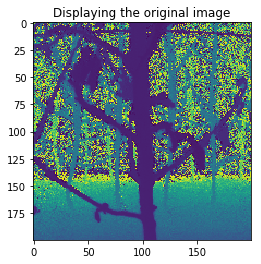

In [6]:
plt.imshow(img['dist'].T)
plt.title('Displaying the original image')

### Filter to remove noise and unwanted trees from the distance image

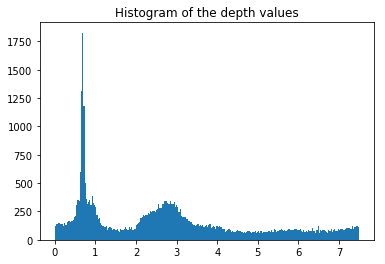

In [7]:
plt.hist(img['dist'].ravel(),256)
plt.title('Histogram of the depth values')
plt.show()

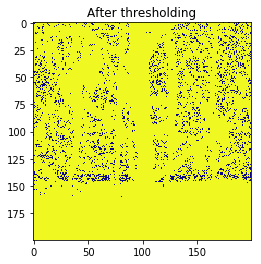

In [8]:
img_ = img['dist'].copy()
distantObjects_mask = img_>6.5

img_[distantObjects_mask] = 1
img_[distantObjects_mask==False] = 0

plt.imshow(img_.T<1,cmap='plasma')
plt.title('After thresholding')
plt.show()

### Find linear structures using Hough Transform

Reference: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html

In [9]:
img_ = img['dist'].T.copy()
lines = cv2.HoughLines(np.uint8(img_.T<1),5,np.pi,0)

In [10]:
img_ = np.stack([np.zeros((img['dist'].T.shape)),np.zeros((img['dist'].T.shape)), img['dist'].T],axis=2)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = rho
    y0 = rho
    x1 = int(x0)
    y1 = int(y0 + 1000*(a))
    x2 = int(x0)
    y2 = int(y0 - 1000*(a))

    cv2.line(img_,(x1,y1),(x2,y2),(0,255,0),2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5,1,'Original Image')

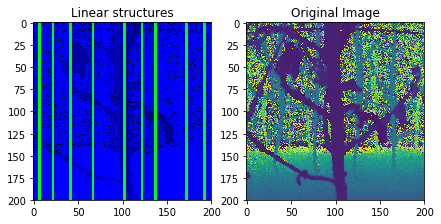

In [15]:
fig, ax = plt.subplots(ncols=2, figsize=(7,5))
ax[0].imshow(img_)
ax[1].imshow(img['dist'].T)
ax[0].set_title('Linear structures')
ax[1].set_title('Original Image')